# SC1015 Mini-Project

## Topic: Analysing the Titanic Disaster
Dataset: https://www.kaggle.com/competitions/titanic

### Team Members:
- **Cadden Chua**
- **Chooi Li Hang**
- **Tristan Ng**

### Project Overview
In this mini-project, we will explore the Titanic dataset to analyse passenger demographics, survival rates, and the factors influencing survival during the tragic sinking of the Titanic. Through comprehensive data analysis and visualisation, we aim to uncover insights that enhance our understanding of this historical event.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
import tensorflow as tf


In [57]:
df = pd.read_csv('titanic/train.csv')

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Key Questions for EDA

1. **What factors most influence survival?**
   - Are there strong correlations between `Pclass`, `Sex`, `Age`, or `Fare` and the target variable `Survived`?

2. **How does passenger class (`Pclass`) impact survival rates?**
   - Do passengers in higher classes have a better chance of survival compared to those in lower classes?

3. **Is there a significant difference in survival between males and females?**
   - How does gender affect the likelihood of survival, and is it consistent across all age groups?

4. **What is the relationship between family size (`SibSp`, `Parch`) and survival?**
   - Does traveling with family members increase or decrease survival chances?

5. **Does the embarkation point (`Embarked`) affect survival chances?**
   - Are there variations in survival rates based on where passengers boarded the ship?

6. **How do age and survival relate?**
   - Are younger passengers more likely to survive than older ones?


----
# Exploratory Data Analysis (EDA)

### Heatmap

A correlation heatmap allows us to visualize the relationships between numerical features and identify any strong correlations.


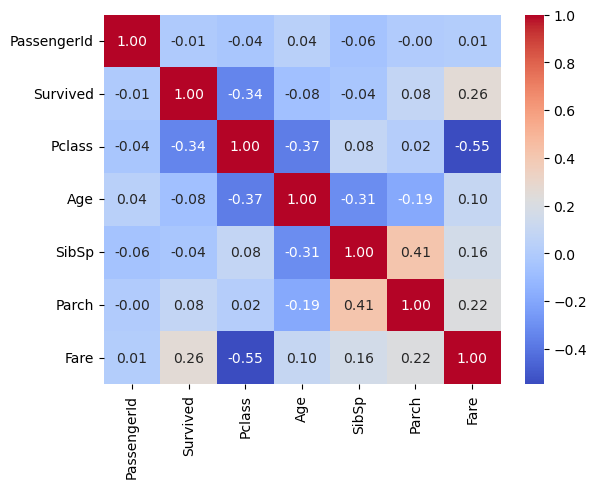

In [60]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


We can see from the above heatmap that variables `Pclass` and `Fare` have a strong correlation with the variable `Survived`.

### Pairplot

A pairplot visually shows relationships between variables using scatterplots and histograms, making it easy to spot correlations, patterns, and outliers.

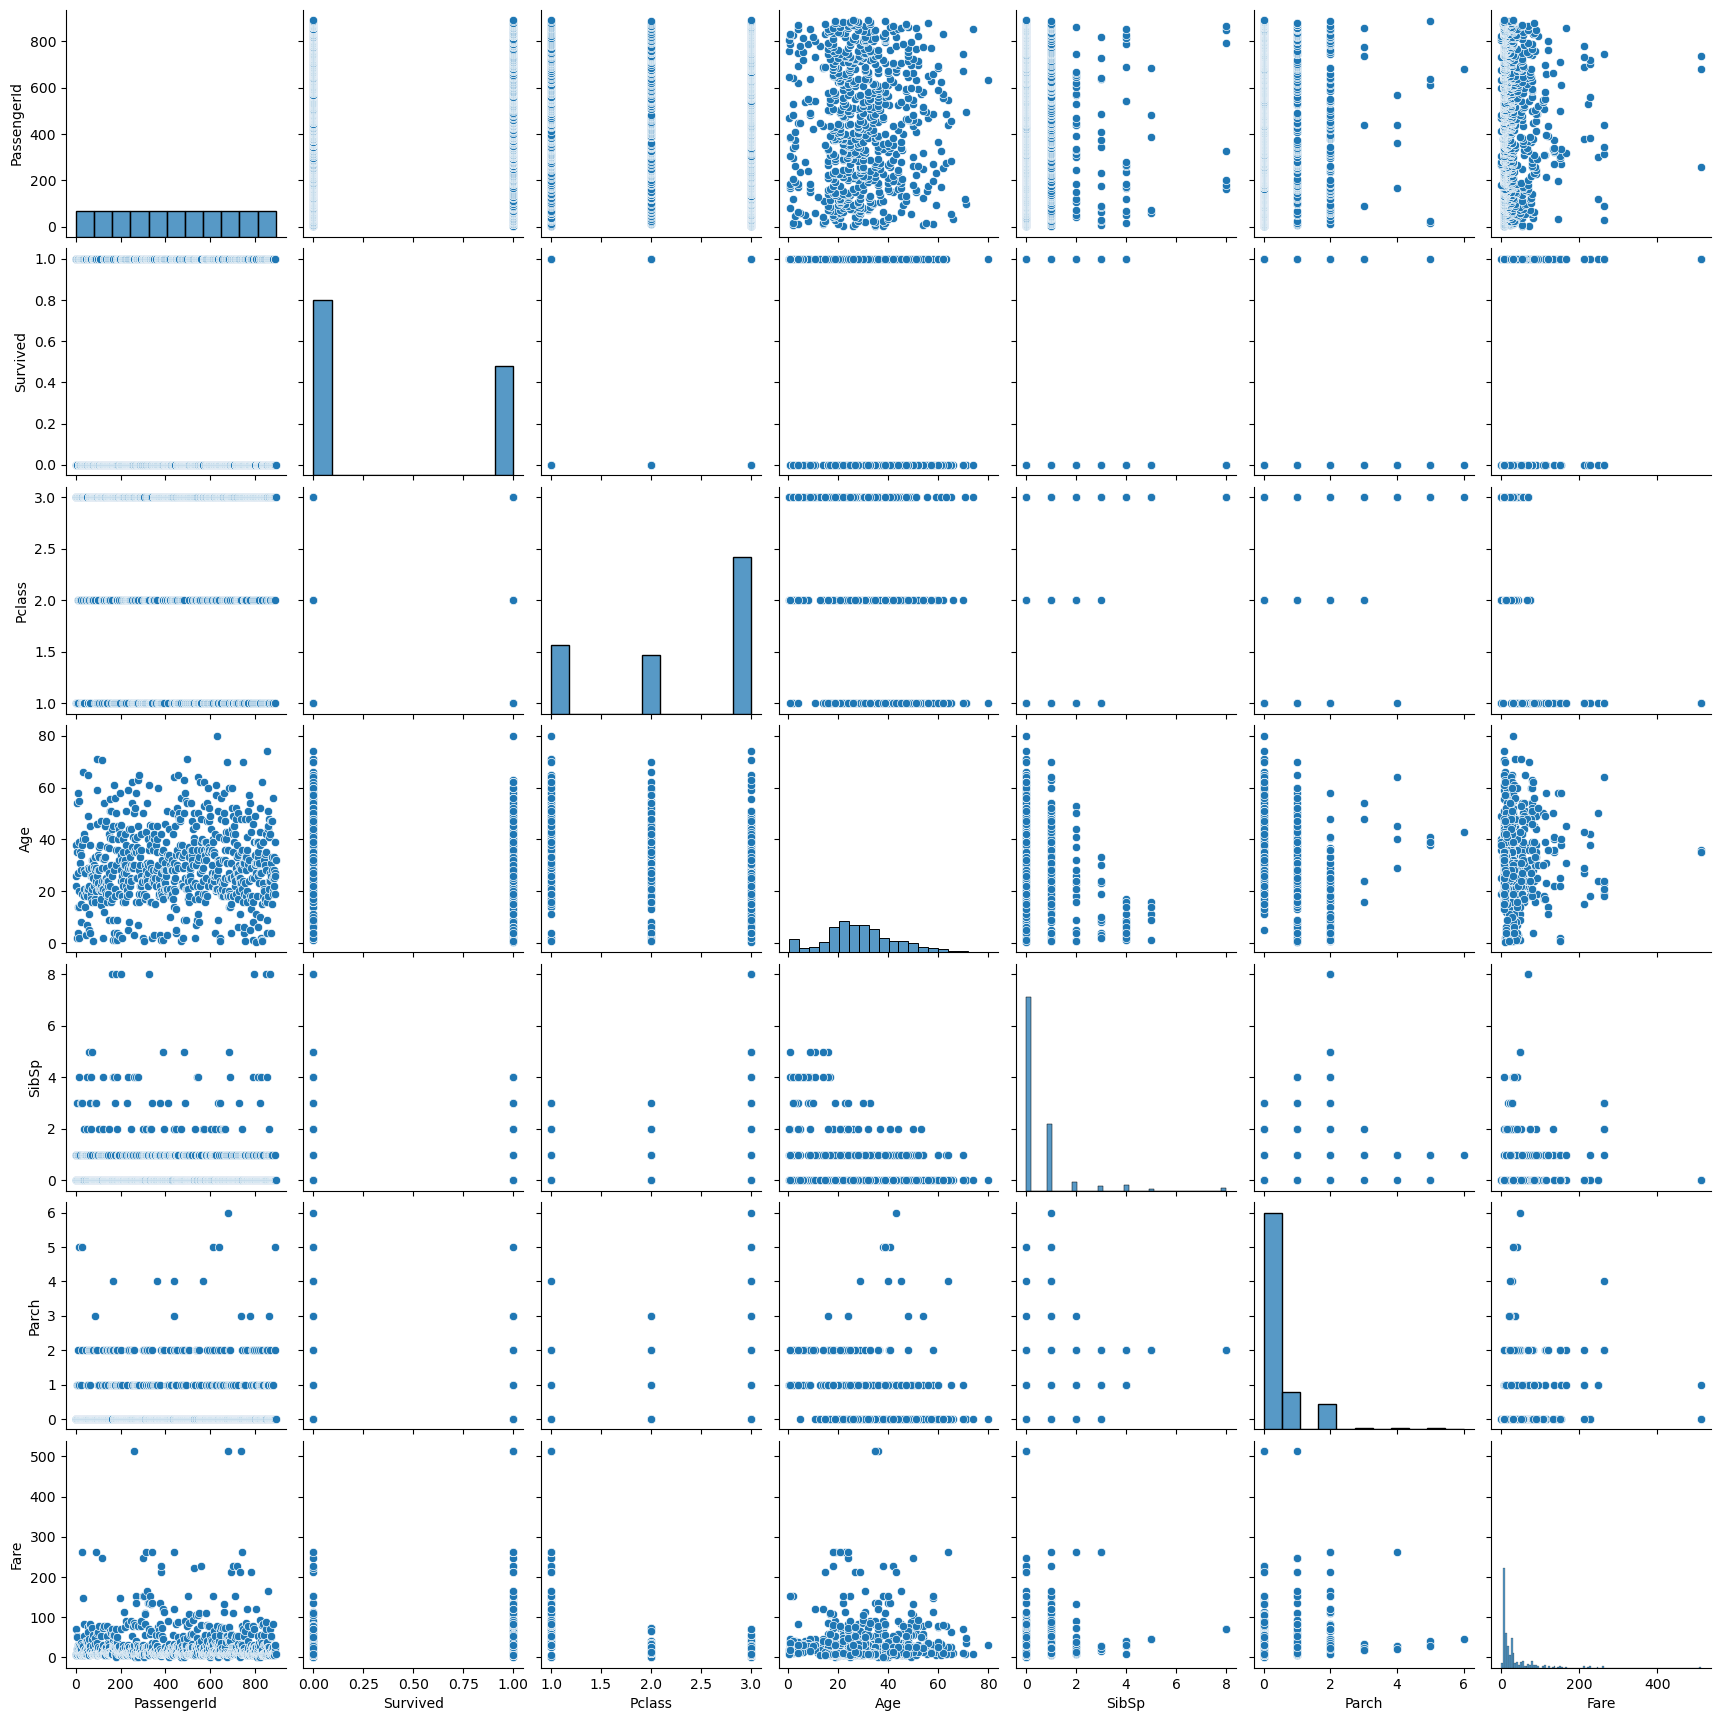

In [61]:
sns.pairplot(data=df)

### Checking Generic Data Structure

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Overall survival rate

Overall Survival Rate is 38.38383838383838%.


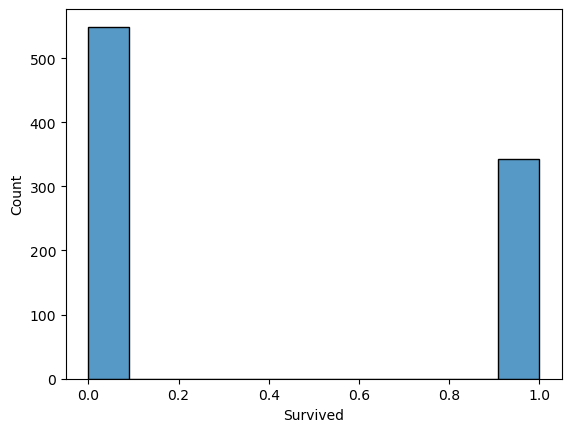

In [65]:
survival_rate = df['Survived'].mean() * 100

print(f"Overall Survival Rate is {survival_rate}%.")
sns.histplot(x='Survived', data=df)
plt.show()

----
## Analysing variables

### Analysing if gender affects survival

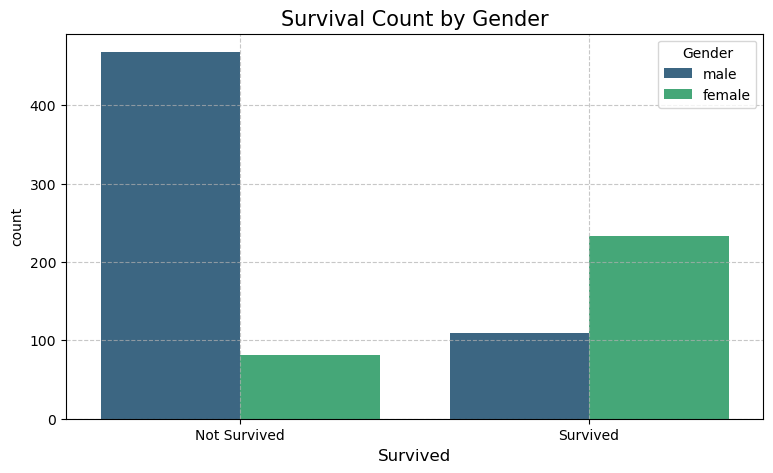

In [66]:
plt.figure(figsize=(9, 5))
sns.countplot(x='Survived', hue='Sex', data=df, palette='viridis')
plt.title('Survival Count by Gender', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Firstly, there are more males than females on the titanic. However, we can see that there is a higher number of proporion of males that did not survive as compared to females and there is a higher number of proporion of females that survive as compared to males.

### Analysing how do age and survival relate

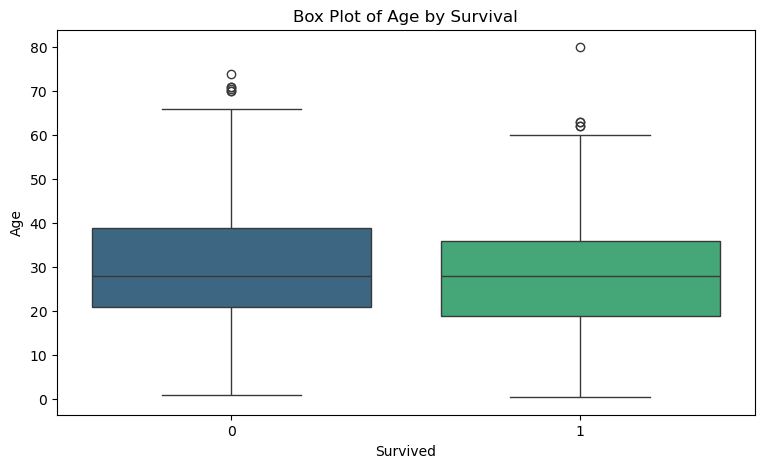

In [67]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='Survived', y='Age', data=df, hue='Survived', palette='viridis', legend=False)
plt.title('Box Plot of Age by Survival')
plt.show()

Since the median ages for both survivors and non-survivors are quite similar, we cannot draw any significant conclusions regarding the impact of age on survival rates.

### Analysing the relationship between family size and survival

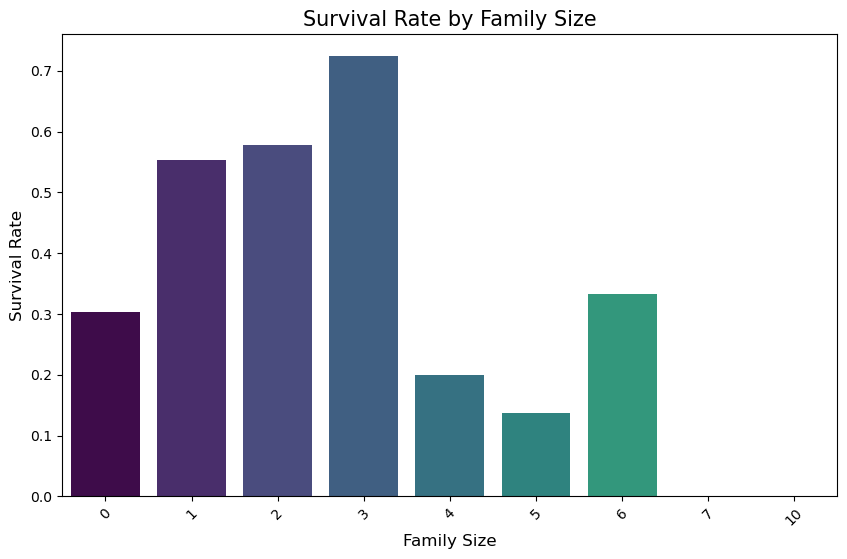

In [68]:
df['FamilySize'] = df['SibSp'] + df['Parch']
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', hue='FamilySize', y='Survived', data=family_survival, palette='viridis', legend=False)
plt.title('Survival Rate by Family Size', fontsize=15)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The bar chart shows that passengers with **three** family members had the `highest survival rate at approximately 70%`.This suggests that moderate family sizes (2-3 members) may enhance survival chances, while larger families may not.

### Analysing how does the embarkation point affect survival chances

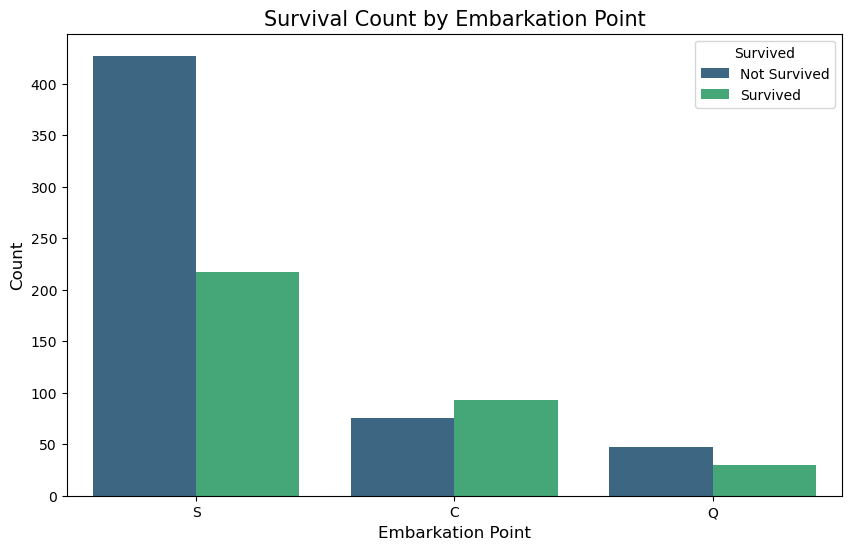

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Embarkation Point', fontsize=15)
plt.xlabel('Embarkation Point', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


Embarkation point influences survival, with point C showing a notably higher survival rate than points S and Q.

### Analysis of Strongly Correlated Variables

As seen and concluded from the heatmap above, `Pclass` and `Fare` have strong correlation with the variable `Survived`.

#### Analysing how does `Pclass` impact survival rate

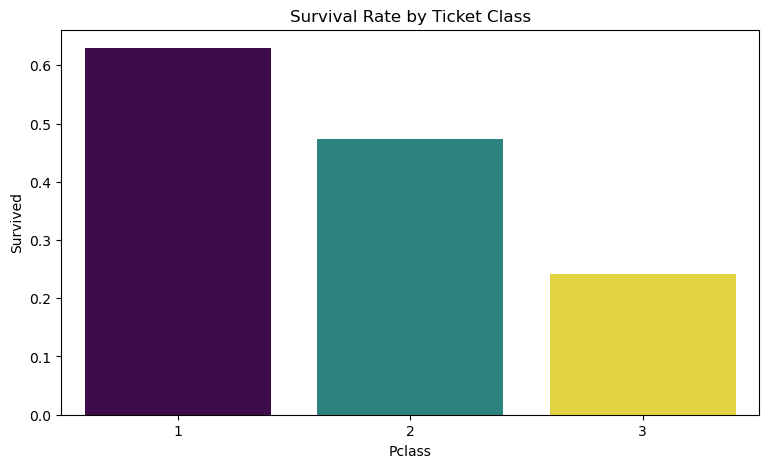

In [70]:
plt.figure(figsize=(9, 5))
sns.barplot(x='Pclass', y='Survived', data=df, hue='Pclass', palette='viridis', errorbar=None, legend=False)
plt.title('Survival Rate by Ticket Class')
plt.show()


We can see from above that the lower the Pclass, the higher the survival rate.

#### Analysing how does `Fare` impact survival rate

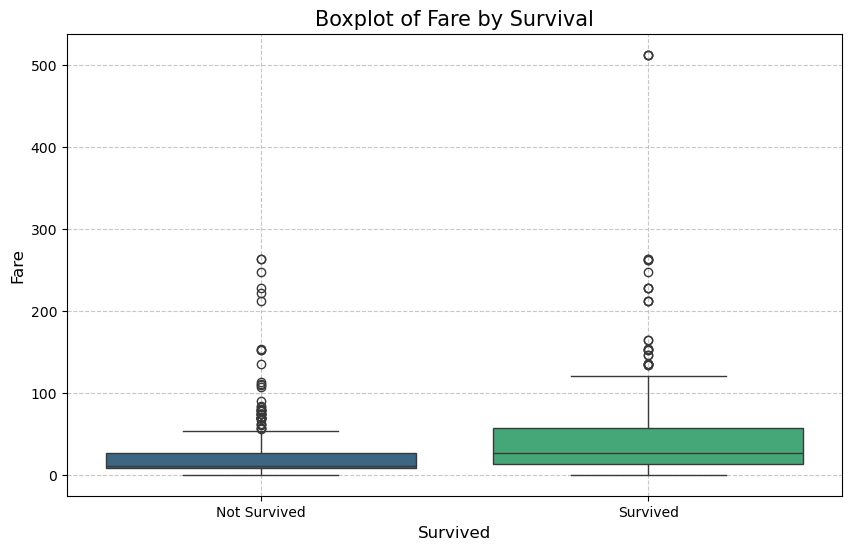

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df, hue='Survived', palette='viridis', legend=False)
plt.title('Boxplot of Fare by Survival', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The boxplot reveals that passengers who survived generally paid higher fares than those who did not, with the median fare for survivors being significantly above that of non-survivors. Additionally, the presence of numerous outliers in the "Not Survived" group suggests that some passengers paid high fares yet still did not survive.

----
# Modelling

## One Hot Encoding for Categorical Features

In [72]:
categorical_cols = ['Sex', 'Embarked']
onehotencoder = OneHotEncoder(sparse_output=False)
encoded_features = onehotencoder.fit_transform(df[categorical_cols])
dfOneHot = pd.DataFrame(encoded_features, columns=onehotencoder.get_feature_names_out(categorical_cols))
print(f"Shape of one-hot encoded features: {dfOneHot.shape}")
print(f"Shape of original DataFrame: {df.shape}")
df_ohe = pd.concat([df.drop(columns=categorical_cols), dfOneHot], axis=1)
df_ohe

Shape of one-hot encoded features: (891, 6)
Shape of original DataFrame: (891, 13)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,1.0,0.0,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,3,1.0,0.0,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0.0,1.0,1.0,0.0,0.0,0.0


### Fitting the data into a TreeClassifier

In [73]:
X = df_ohe[['Fare', 'Pclass', 'Age', 'FamilySize', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']]
y = df_ohe['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=71, shuffle=True)

clf_tree = DecisionTreeClassifier(random_state=71)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.78
Decision Tree Confusion Matrix:
 [[140  35]
 [ 25  68]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       175
           1       0.66      0.73      0.69        93

    accuracy                           0.78       268
   macro avg       0.75      0.77      0.76       268
weighted avg       0.78      0.78      0.78       268



### Extracting Feature Importance in Decision Tree

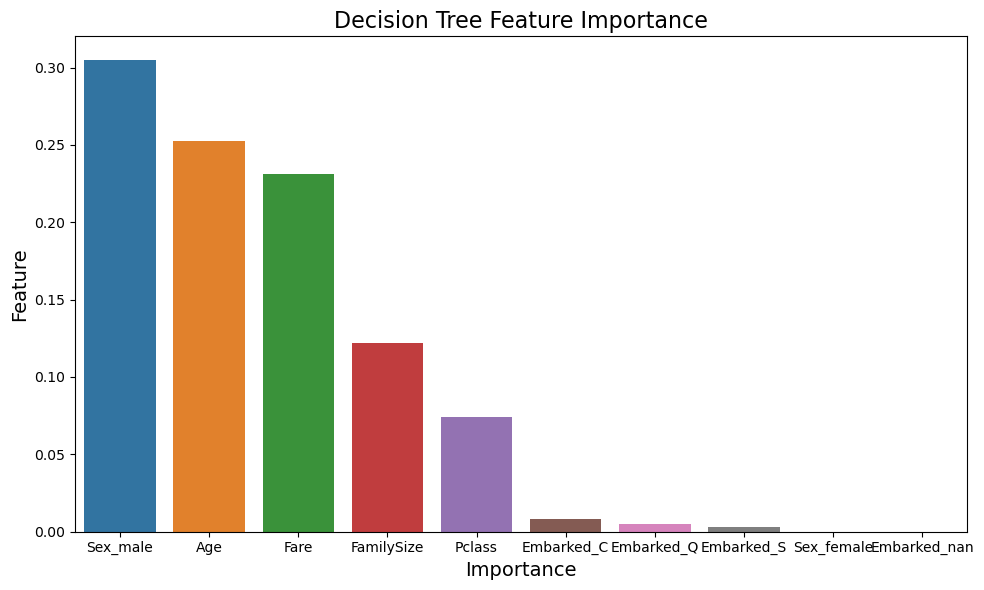

In [74]:
feature_importance_tree = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_tree, hue='Feature', legend=False)
plt.title('Decision Tree Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

In [75]:
clf_forest = RandomForestClassifier(random_state=71)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Random Forest Accuracy: {accuracy_forest:.2f}')

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.81
Random Forest Confusion Matrix:
 [[146  29]
 [ 21  72]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       175
           1       0.71      0.77      0.74        93

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.82      0.81      0.82       268



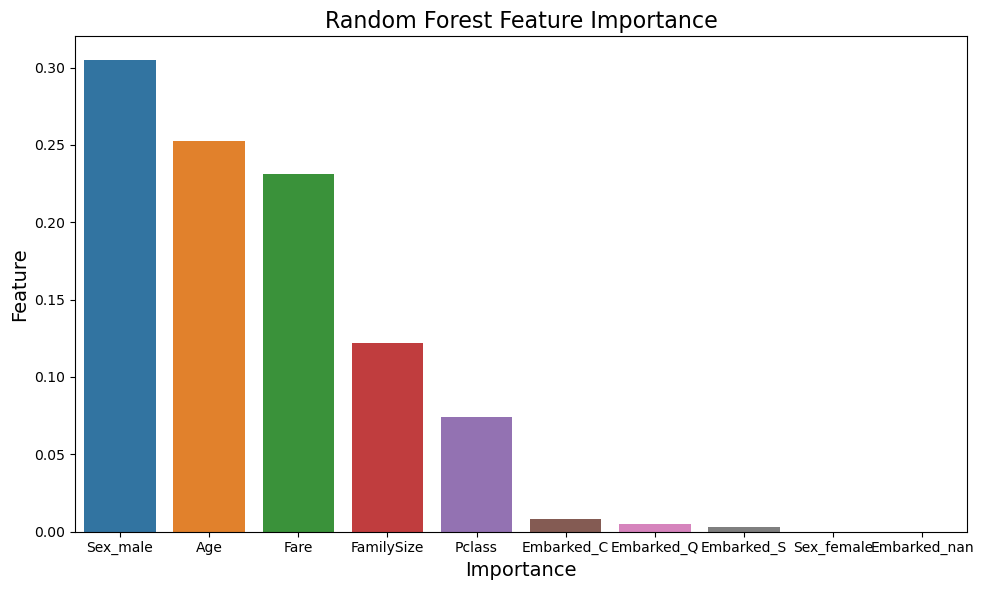

In [76]:
feature_importance_forest = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_tree, hue='Feature', legend=False)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

From both the Random Forest Classifier and Decision Tree Classifier, we selected the top five features for future models based on their importance: `sex_male`, `age`, `fare`, `family size`, and `pclass`.

## Using the Top 5 Important Features for Various Models

In [77]:
df_ohe['Age'] = df_ohe['Age'].fillna(df_ohe['Age'].median())
features = ['Sex_male', 'Age', 'Fare', 'FamilySize', 'Pclass']
X = df_ohe[features]
y = df_ohe['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=71, shuffle=True)

# Dummy Classifier
dummy_model = DummyClassifier(strategy='most_frequent', random_state=71) 
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
cv_dummy = cross_val_score(dummy_model, X, y, cv=5).mean()

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=71)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cv_dt = cross_val_score(dt_model, X, y, cv=10).mean()

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=71)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cv_rf = cross_val_score(rf_model, X, y, cv=10).mean()

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=71)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cv_xgb = cross_val_score(xgb_model, X, y, cv=10).mean()

#Logistic Classifier
logreg_model = LogisticRegression(random_state=71, max_iter=1000) 
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
cv_logreg = cross_val_score(logreg_model, X, y, cv=10).mean()

print(f'Dummy Classifier Accuracy: {accuracy_dummy:.2f}, CV Score: {cv_dummy:.2f}')
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}, CV Score: {cv_dt:.2f}')
print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}, CV Score: {cv_logreg:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}, CV Score: {cv_rf:.2f}')
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}, CV Score: {cv_xgb:.2f}')

Dummy Classifier Accuracy: 0.65, CV Score: 0.62
Decision Tree Accuracy: 0.76, CV Score: 0.77
Logistic Regression Accuracy: 0.81, CV Score: 0.79
Random Forest Accuracy: 0.84, CV Score: 0.82
XGBoost Accuracy: 0.82, CV Score: 0.82


### Model Performance Summary

#### Random Forest Classifier
- **Accuracy**: 0.84
- **Cross-Validation Score**: 0.82
- **Summary**: The Random Forest Classifier emerged as the best-performing model, achieving the highest cross-validation score of 0.82, alongside an accuracy of 0.84. This makes it the preferred model for predicting survival in this dataset.

#### XGBoost Classifier
- **Accuracy**: 0.82
- **Cross-Validation Score**: 0.82
- **Summary**: The XGBoost Classifier also performed well with a cross-validation score of 0.82 and an accuracy of 0.82, demonstrating its effectiveness as a predictive model.

#### Logistic Regression
- **Accuracy**: 0.81
- **Cross-Validation Score**: 0.79
- **Summary**: Logistic Regression performed reasonably well, achieving a cross-validation score of 0.79 and an accuracy of 0.81, indicating good generalisation ability.

#### Decision Tree Classifier
- **Accuracy**: 0.76
- **Cross-Validation Score**: 0.77
- **Summary**: The Decision Tree Classifier lagged behind with a CV score of 0.77 and an accuracy of 0.76, indicating limitations in generalisation compared to the ensemble methods.

#### Dummy Classifier
- **Accuracy**: 0.65
- **Cross-Validation Score**: 0.62
- **Summary**: As expected, the Dummy Classifier, which uses the most frequent class, had the lowest performance with an accuracy of 0.65 and a CV score of 0.62.

---

**Overall Conclusion**: The **Random Forest Classifier** is the preferred model due to its highest accuracy and cross-validation score, outperforming other models on this dataset.


### Fine tuning the best model 

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=71)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

cv_score = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy').mean()

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Random Forest Test Accuracy: {accuracy_rf:.2f}')
print(f'Cross-Validation Score: {cv_score:.2f}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}
Random Forest Test Accuracy: 0.86
Cross-Validation Score: 0.84


## Fine-Tuned Random Forest Classifier Performance

### Best Parameters:
- **Bootstrap**: False
- **Max Depth**: 10
- **Min Samples Leaf**: 2
- **Min Samples Split**: 15
- **Number of Estimators**: 200

### Performance Metrics:
- **Test Accuracy**: 0.86
- **Cross-Validation Score**: 0.84

### Summary:
After fine-tuning, the Random Forest Classifier showed improved performance with a test accuracy of 0.86 and a cross-validation score of 0.84. The model's fine-tuned parameters — including a max depth of 10, minimum samples per leaf of 2, and a minimum samples split of 15 — helped enhance its generalisation ability and predictive accuracy. This solidifies the Random Forest Classifier as the optimal choice for predicting survival in this dataset.


----
## Trying Dense Neural Network

We tried to utilise `Dense Neural Network` (DNN) in this project since it can be powerful at capturing **complex, non-linear** relationships between features, which the simpler models above may struggle with. The DNN might help to capture subtle interactions between features more effectively.

In [79]:
sc = StandardScaler()
X_scaler = sc.fit_transform(X.to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y.to_numpy(), test_size=0.3, random_state=71, shuffle=True)

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(4, activation='relu'),
           tf.keras.layers.Dense(16, activation='relu'),
           tf.keras.layers.Dense(32, activation='relu'),
           tf.keras.layers.Dense(64, activation='relu'),
           tf.keras.layers.Dense(2, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
                 metrics=['accuracy'])

history = model_1.fit(X_train, 
                      tf.one_hot(y_train, depth=2), 
                      epochs=250,
                      verbose = 1,
                      validation_data=(X_test, tf.one_hot(y_test, depth=2)))

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6176 - loss: 0.6904 - val_accuracy: 0.7015 - val_loss: 0.6845
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.6841 - val_accuracy: 0.7090 - val_loss: 0.6760
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - loss: 0.6779 - val_accuracy: 0.7164 - val_loss: 0.6681
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.6725 - val_accuracy: 0.7351 - val_loss: 0.6609
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 0.6674 - val_accuracy: 0.7351 - val_loss: 0.6540
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - loss: 0.6626 - val_accuracy: 0.7425 - val_loss: 0.6476
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.6581 - val_accuracy: 0.7463 - val_loss: 0.6412
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.6536 - val_accuracy: 0.7500 - 

In [80]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,892 (11.30 KB)

 Trainable params: 2,890 (11.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Neural Network Training with TensorFlow

In this project, we chose to implement a neural network using TensorFlow to learn more about deep learning techniques beyond the course content. The model consists of several dense layers, utilizing the ReLU activation function, and is trained for binary classification on a standardised dataset.

#### Key Points:
- **Data Preprocessing**: Features are scaled using `StandardScaler`.
- **Model Architecture**: A sequential model is created with multiple dense layers.
- **Training**: The model is trained using stochastic gradient descent with early stopping to prevent overfitting.

This implementation not only enhances our understanding of neural networks but also demonstrates practical skills in using TensorFlow for machine learning.

In addition, we also can see that the neural network model performed reasonably well.


----